In [36]:
from nestedmodels import read_toml, NestedModel
import pandas as pd
import numpy as np
import arviz
import io
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [37]:
configuration = read_toml("./data/example2.toml")

In [38]:
model = NestedModel(configuration)

In [39]:
data = pd.read_excel("./data/volvo_germany_optimizer.xlsx")

In [5]:
data

,BrandSpend,PerfSpend,Consideration,EVUnits
0,1.046551e+07,2.340910e+06,15.203059,27840
1,8.931700e+06,4.443731e+06,14.615875,22902
2,1.118668e+07,3.452355e+06,11.919563,25792
3,2.655153e+04,2.466073e+04,11.084743,29296
4,8.957439e+06,5.776251e+06,15.385778,62873
5,8.914693e+06,2.417593e+06,15.887491,30079
6,6.710488e+06,2.332439e+06,14.413000,40416
7,1.023245e+07,5.316150e+06,13.299635,36702
8,5.326697e+05,1.620981e+05,13.063949,27760
9,1.283952e+07,4.404544e+06,17.174094,70415


In [6]:
model.fit(data[['BrandSpend', 'PerfSpend']], data[['Consideration', 'EVUnits']])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [BrandSpend_Consideration_coefficient, BrandSpend_Consideration_half_life, BrandSpend_Consideration_saturation, PerfSpend_Consideration_coefficient, PerfSpend_Consideration_saturation, PerfSpend_EVUnits_coefficient, Consideration_intercept, Consideration_sigma, Consideration_EVUnits_coefficient, EVUnits_intercept, EVUnits_sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
There were 111 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


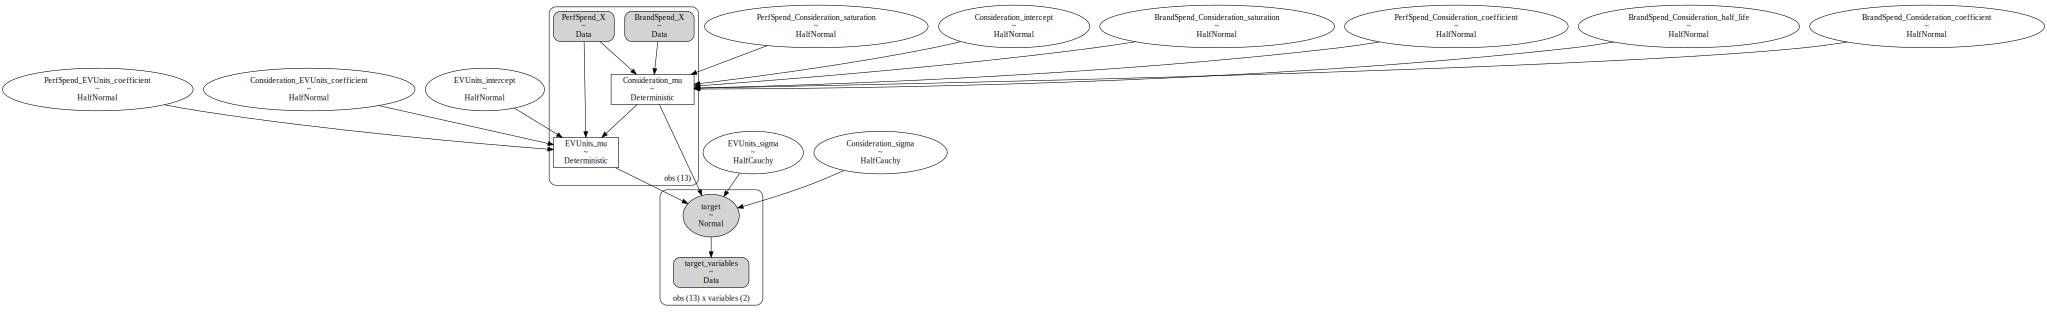

In [7]:
model.to_graphviz()

In [8]:
model.summary()

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,prior
BrandSpend_Consideration_coefficient,5.951,3.484,0.010,11.350,0.121,0.091,814.0,1163.0,1.01,"HalfNormal(0, 20)"
BrandSpend_Consideration_half_life,16.320,12.172,0.017,37.869,0.256,0.181,1530.0,1036.0,1.00,"HalfNormal(0, 20)"
BrandSpend_Consideration_saturation,15.960,12.187,0.006,37.820,0.311,0.220,988.0,614.0,1.00,"HalfNormal(0, 20)"
PerfSpend_Consideration_coefficient,5.959,3.475,0.015,11.384,0.128,0.091,491.0,141.0,1.01,"HalfNormal(0, 20)"
PerfSpend_Consideration_saturation,16.241,11.729,0.020,37.222,0.288,0.203,1336.0,1146.0,1.00,"HalfNormal(0, 20)"
PerfSpend_EVUnits_coefficient,0.010,0.002,0.007,0.013,0.000,0.000,1704.0,1653.0,1.00,"HalfNormal(0, 20)"
Consideration_intercept,1.549,1.164,0.002,3.665,0.028,0.020,1040.0,433.0,1.00,"HalfNormal(0, 2)"
Consideration_sigma,2.483,0.546,1.621,3.530,0.014,0.010,1073.0,544.0,1.00,"HalfCauchy(0, 2)"
Consideration_EVUnits_coefficient,16.675,12.438,0.016,38.649,0.278,0.197,1381.0,1096.0,1.00,"HalfNormal(0, 20)"
EVUnits_intercept,1.600,1.171,0.001,3.707,0.026,0.018,1426.0,960.0,1.00,"HalfNormal(0, 2)"


array([[<Axes: title={'center': 'BrandSpend_Consideration_coefficient'}>,
        <Axes: title={'center': 'BrandSpend_Consideration_coefficient'}>],
       [<Axes: title={'center': 'BrandSpend_Consideration_half_life'}>,
        <Axes: title={'center': 'BrandSpend_Consideration_half_life'}>],
       [<Axes: title={'center': 'BrandSpend_Consideration_saturation'}>,
        <Axes: title={'center': 'BrandSpend_Consideration_saturation'}>],
       [<Axes: title={'center': 'PerfSpend_Consideration_coefficient'}>,
        <Axes: title={'center': 'PerfSpend_Consideration_coefficient'}>],
       [<Axes: title={'center': 'PerfSpend_Consideration_saturation'}>,
        <Axes: title={'center': 'PerfSpend_Consideration_saturation'}>],
       [<Axes: title={'center': 'PerfSpend_EVUnits_coefficient'}>,
        <Axes: title={'center': 'PerfSpend_EVUnits_coefficient'}>],
       [<Axes: title={'center': 'Consideration_intercept'}>,
        <Axes: title={'center': 'Consideration_intercept'}>],
       [<

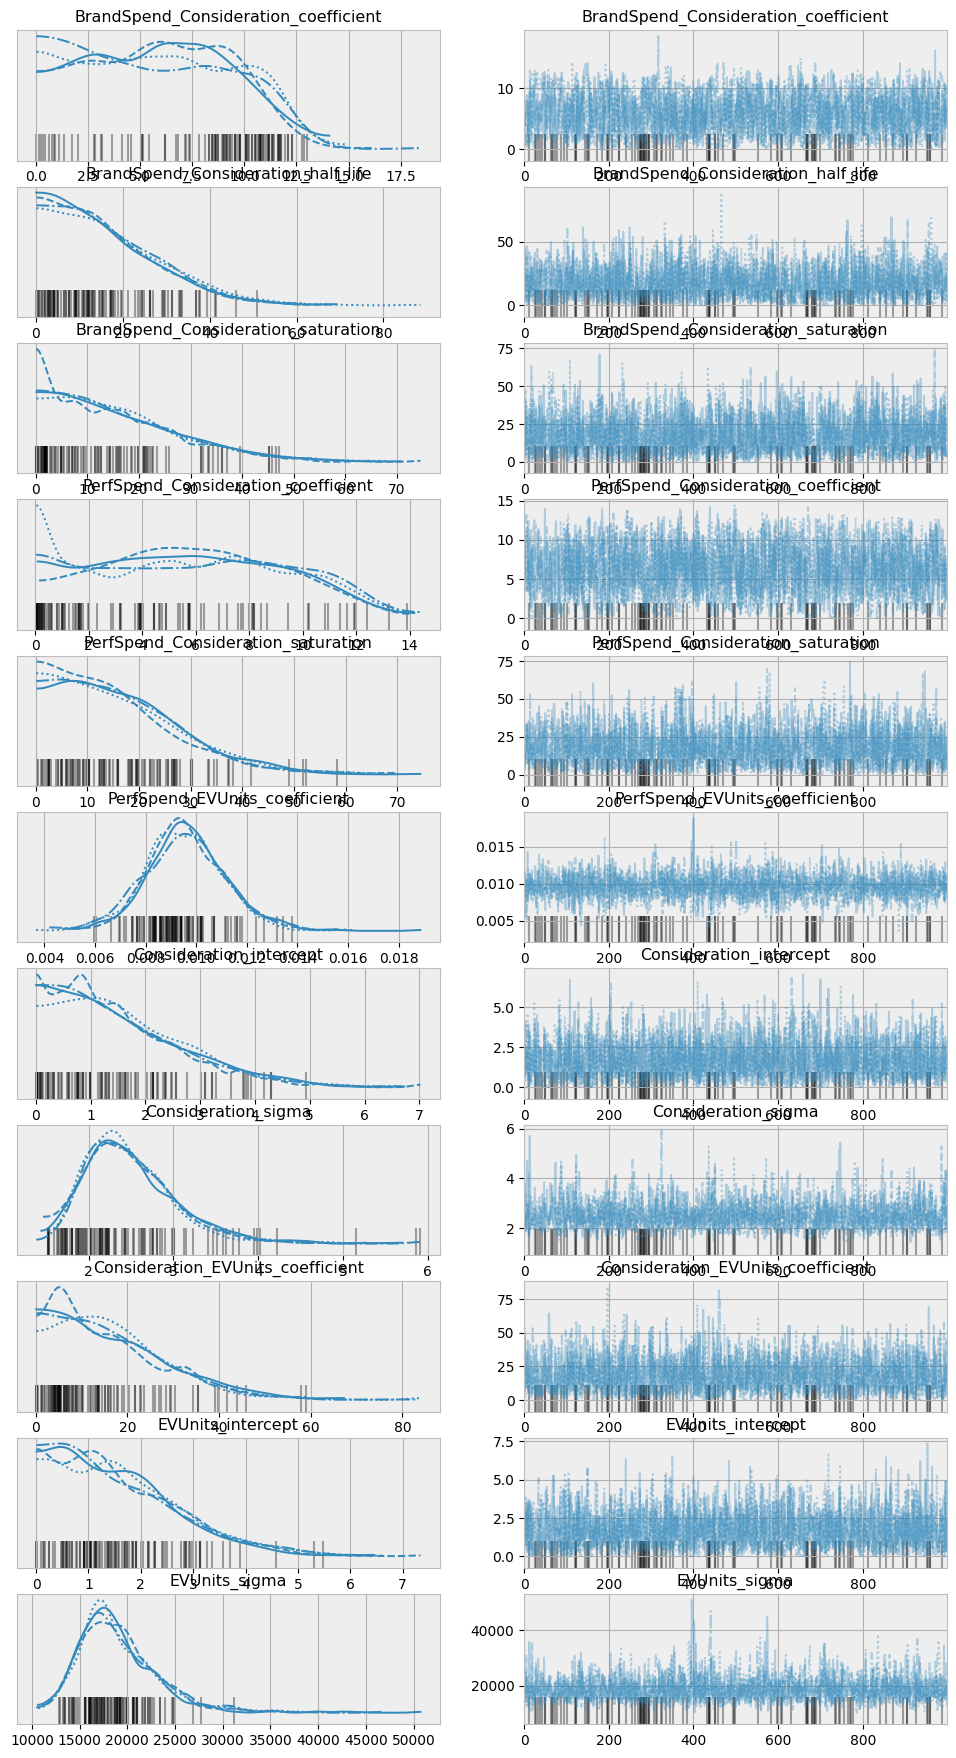

In [9]:
model.plot_trace()

In [37]:
pred = model.predict(data[['BrandSpend', 'PerfSpend']])

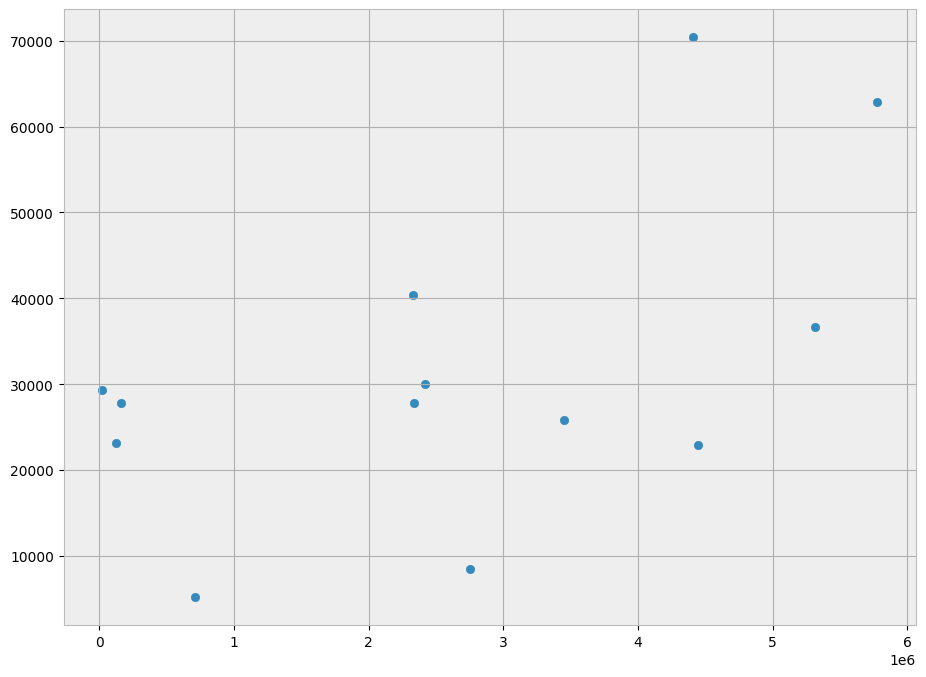

In [45]:
plt.scatter(data['PerfSpend'], data['EVUnits'])

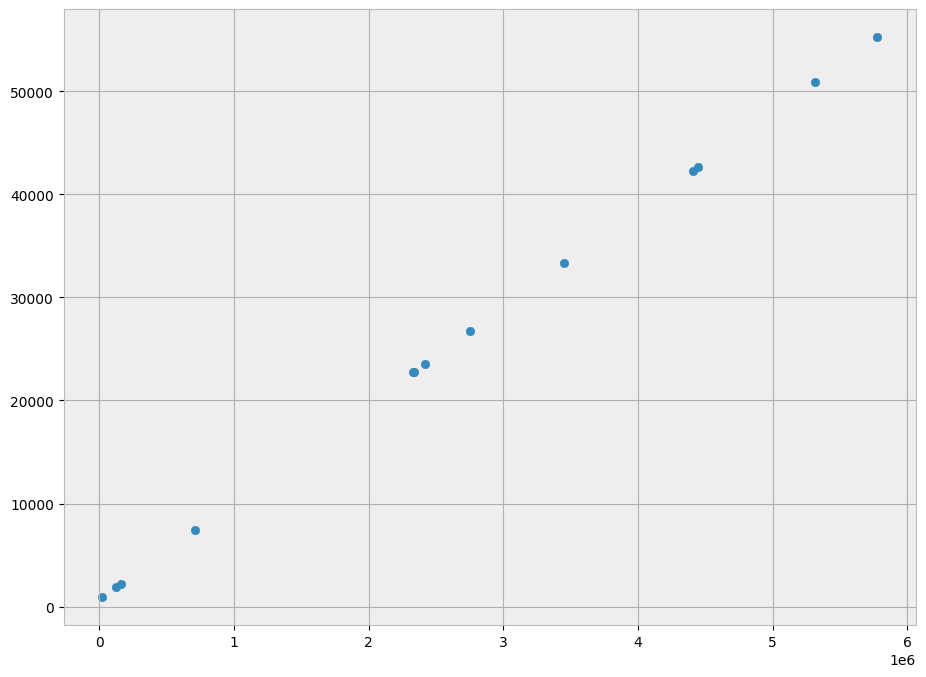

In [46]:
plt.scatter(data['PerfSpend'], pred['EVUnits'].data.mean(axis=0))

In [1]:
from nestedmodels import read_toml, NestedModel
import pandas as pd
import numpy as np
import arviz
import io
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [4]:
adv_data = pd.read_excel("./data/advertising_dataset.xlsx")

In [5]:
adv_data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [6]:
config = read_toml("./data/advertising_config.toml")
model = NestedModel(config)

In [7]:
model.fit(adv_data[['newspaper', 'radio']], adv_data[['TV', 'sales']], **dict(draws=1000, tune=1000, chains=4))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [radio_TV_coefficient, newspaper_TV_saturation, newspaper_TV_coefficient, TV_intercept, TV_sigma, TV_sales_coefficient, sales_intercept, sales_sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 15 seconds.


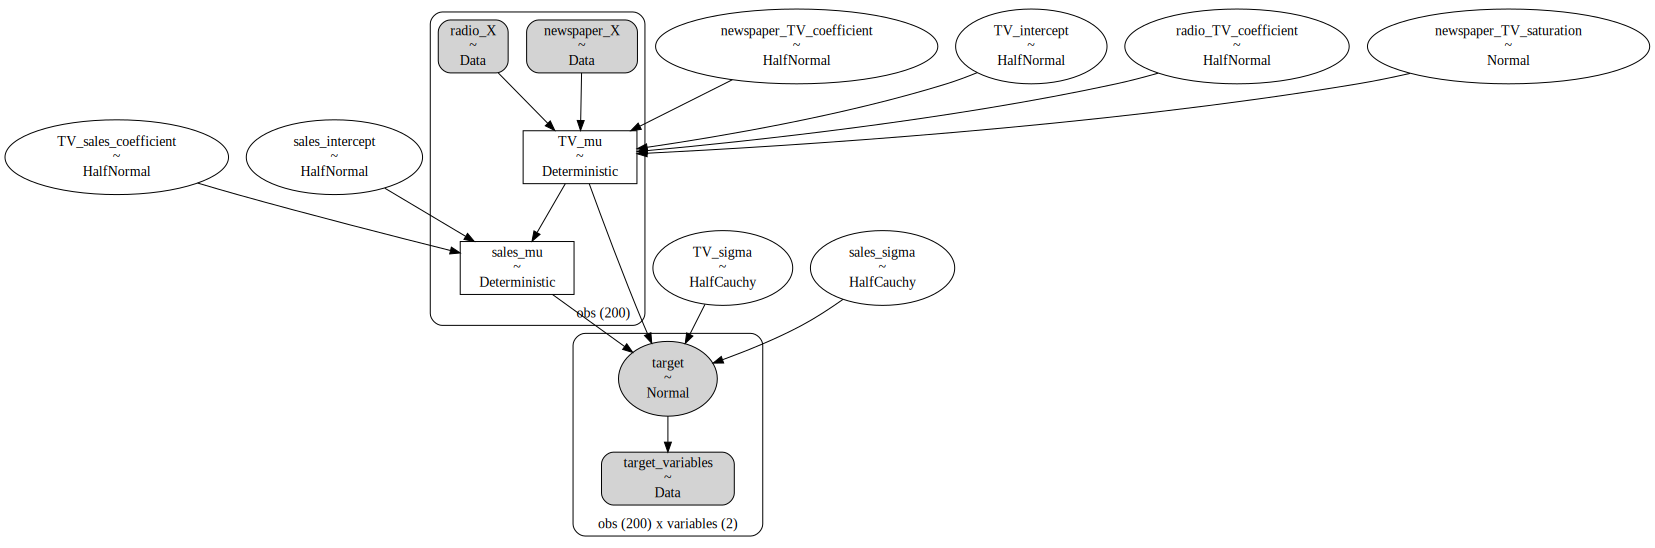

In [8]:
model.to_graphviz(remove_intermediate=True)

In [9]:
model.idata.posterior['sales_mu'].data.reshape(-1, 200)

array([[17.0500794 , 17.45079513, 19.22955397, ...,  9.26738569,
        18.18006355,  9.10090278],
       [17.49481522, 17.91588878, 19.77451134, ...,  9.39896269,
        18.67684553,  9.21829288],
       [17.52706571, 17.94709942, 19.80101279, ...,  9.45101227,
        18.70611622,  9.27103734],
       ...,
       [17.27588177, 17.65399377, 19.32428977, ...,  9.99366056,
        18.33797902,  9.83261061],
       [17.17689909, 17.56783035, 19.2967171 , ...,  9.60586047,
        18.27601303,  9.44731324],
       [17.71156995, 18.11708947, 19.91945784, ...,  9.80898115,
        18.85626965,  9.64395229]])

In [10]:
y = model.predict(adv_data[['newspaper', 'radio']])

In [11]:
abs(y['sales'].data - model.idata.posterior['sales_mu'].data.reshape(-1, 200)).sum()

2.941202836836965e-11

In [12]:
y['sales'].data[~(y['sales'].data == model.idata.posterior['sales_mu'].data.reshape(-1, 200))]

array([ 7.54984611, 14.08772583,  8.45440138, ..., 14.65544633,
       14.84906461,  7.73717758])

In [14]:
df = model.summary(remove_intermediate=False)
df

/home/ld/.cache/pypoetry/virtualenvs/nestedmodels-OVUv3JJf-py3.10/lib/python3.10/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,prior
newspaper_TV_saturation,9.878,0.970,7.985,11.653,0.017,0.012,3308.0,2854.0,1.0,"Normal(10, 1)"
radio_TV_coefficient,4.321,0.289,3.789,4.863,0.005,0.004,2903.0,2964.0,1.0,"HalfNormal(0, 2)"
newspaper_TV_coefficient,3.542,1.797,0.225,6.614,0.036,0.026,1975.0,1224.0,1.0,"HalfNormal(0, 2)"
TV_intercept,1.348,0.806,0.001,2.715,0.016,0.011,1987.0,1172.0,1.0,"HalfNormal(0, 1)"
TV_sigma,112.776,5.726,102.369,123.403,0.099,0.070,3404.0,2865.0,1.0,"HalfCauchy(0, 0.1)"
...,...,...,...,...,...,...,...,...,...,...
sales_mu[195],7.963,0.470,7.117,8.856,0.008,0.006,3134.0,2834.0,1.0,"Deterministic(f(\text{sales_intercept}, \text{..."
sales_mu[196],8.249,0.454,7.427,9.127,0.008,0.006,3107.0,3020.0,1.0,"Deterministic(f(\text{sales_intercept}, \text{..."
sales_mu[197],9.440,0.395,8.722,10.200,0.007,0.005,3193.0,3316.0,1.0,"Deterministic(f(\text{sales_intercept}, \text{..."
sales_mu[198],18.546,0.504,17.592,19.459,0.008,0.006,3578.0,3266.0,1.0,"Deterministic(f(\text{sales_intercept}, \text{..."


In [ ]:
d

/home/ld/.cache/pypoetry/virtualenvs/nestedmodels-OVUv3JJf-py3.10/lib/python3.10/site-packages/arviz/stats/density_utils.py:488: UserWarning: Your data appears to have a single value or no finite values
  warnings.warn("Your data appears to have a single value or no finite values")


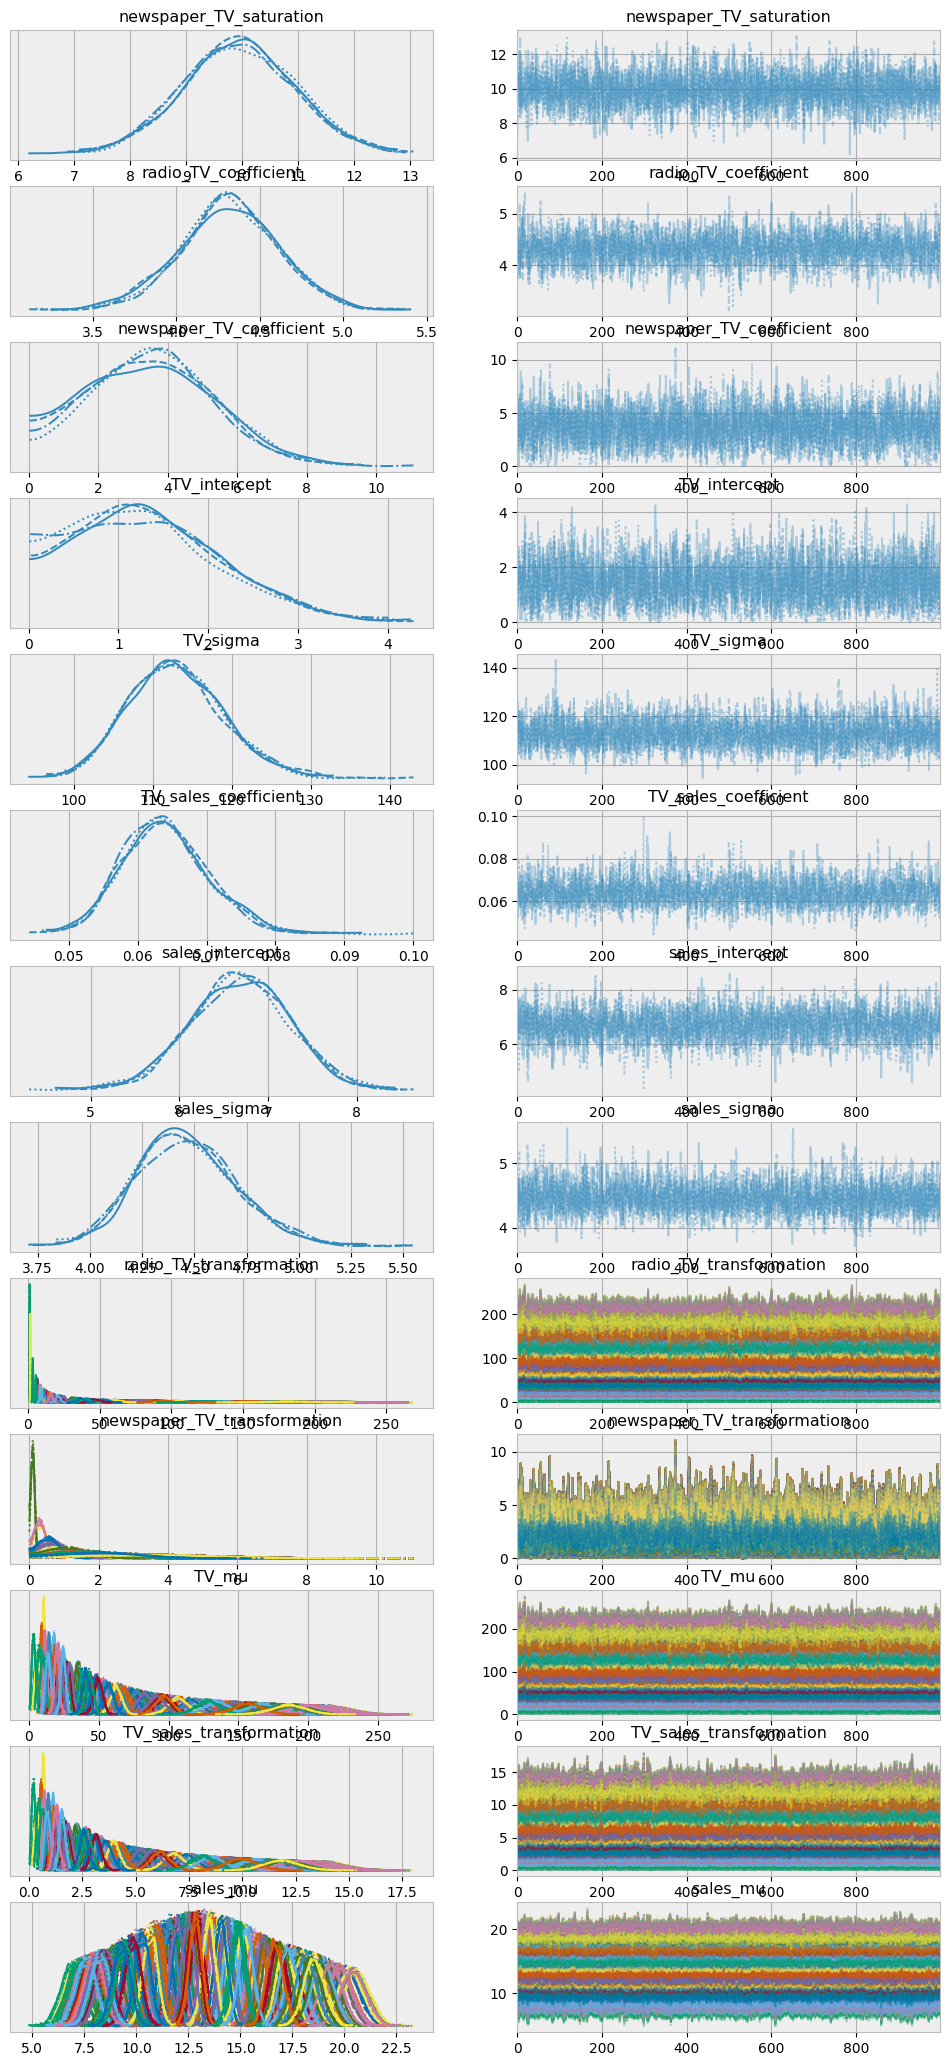

In [34]:
model.plot_trace(remove_intermediate=False)
plt.show()